In [1]:
# Call necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from numpy import absolute

In [2]:
#Data Acquisition
from google.colab import files
uploaded = files.upload()


Saving TOC_Prediction_DataSet.xlsx to TOC_Prediction_DataSet.xlsx


In [3]:
import io
data = pd.read_excel(io.BytesIO(uploaded['TOC_Prediction_DataSet.xlsx']))

In [4]:
# Data features display
data.columns

Index(['Thickness_ft', 'Bulk Density_gg per cc', 'Resistivity_ohmsm',
       'Effective Porosity_Fraction', 'Clay Volume_ Fraction',
       'Water Saturation_Fraction', 'TOC_Fraction'],
      dtype='object')

In [5]:
# Data Content Summary
data.describe()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,150.448933,2.423001,3.892432,0.061492,0.271257,0.435876,0.052630
std,52.452284,0.019059,1.342193,0.014805,0.045289,0.080023,0.005062
min,50.218753,2.386117,1.680451,0.017432,0.153118,0.230041,0.030830
25%,123.462354,2.409469,3.120852,0.051250,0.238607,0.372234,0.051026
50%,141.662622,2.422639,3.650354,0.061158,0.264785,0.442414,0.053662
75%,166.707110,2.433418,4.319585,0.072289,0.303776,0.490972,0.056100
max,475.992627,2.540608,15.970625,0.096054,0.413083,0.683304,0.060907


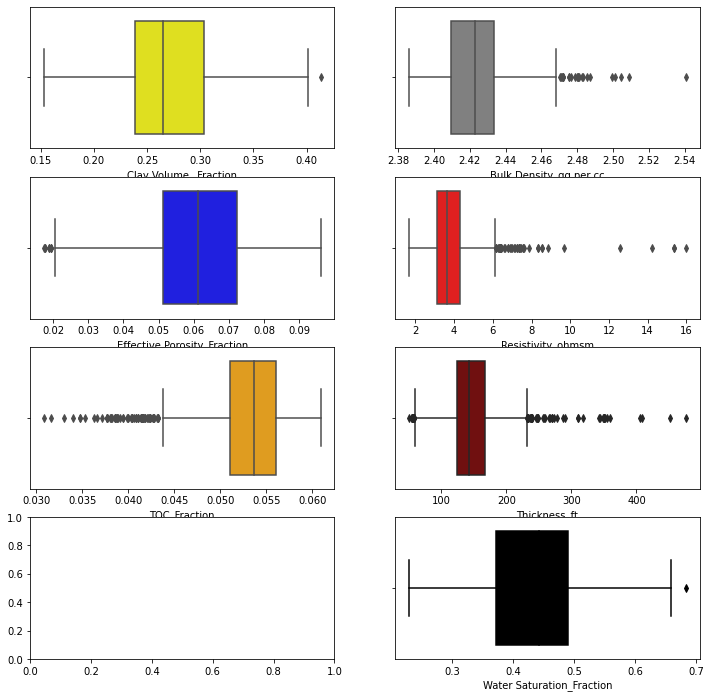

In [6]:
# Box plot generation for outliers detection in each feature
f,axes = plt.subplots(4,2, figsize=(12,12))
sns.boxplot(x=data['Bulk Density_gg per cc'], color='grey', ax=axes[0,1])
sns.boxplot(x=data['Clay Volume_ Fraction'], color='yellow', ax=axes[0,0])
sns.boxplot(x=data['Effective Porosity_Fraction'], color='blue', ax=axes[1,0])
sns.boxplot(x=data['Resistivity_ohmsm'], color='red', ax=axes[1,1])
sns.boxplot(x=data['TOC_Fraction'], color='orange', ax=axes[2,0])
sns.boxplot(x=data['Thickness_ft'], color='maroon', ax=axes[2,1])
sns.boxplot(x=data['Water Saturation_Fraction'], color='black', ax=axes[3,1])

In [7]:
df=data

In [8]:
# Data cleaning - Removing outliers
df=df[(df['Thickness_ft']>0)&(df['Thickness_ft']<240)]
df=df[(df['Bulk Density_gg per cc']>0)&(df['Bulk Density_gg per cc']<2.47)]
df=df[(df['Resistivity_ohmsm']>0)&(df['Resistivity_ohmsm']<6.1)]
df=df[(df['TOC_Fraction']>0.042)&(df['TOC_Fraction']<0.08)]
df.describe()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,149.987326,2.419593,3.707562,0.063430,0.264851,0.431145,0.053756
std,37.473073,0.015873,0.823255,0.014140,0.041268,0.072247,0.003537
min,62.901831,2.386117,1.680451,0.021407,0.153118,0.230041,0.042159
25%,126.122632,2.407908,3.125468,0.052672,0.234800,0.376059,0.051851
50%,142.043793,2.420265,3.599163,0.062986,0.258269,0.440302,0.054473
75%,166.571768,2.431194,4.210482,0.072953,0.296944,0.483732,0.056258
max,239.888257,2.467620,6.052624,0.096054,0.382887,0.654794,0.060907


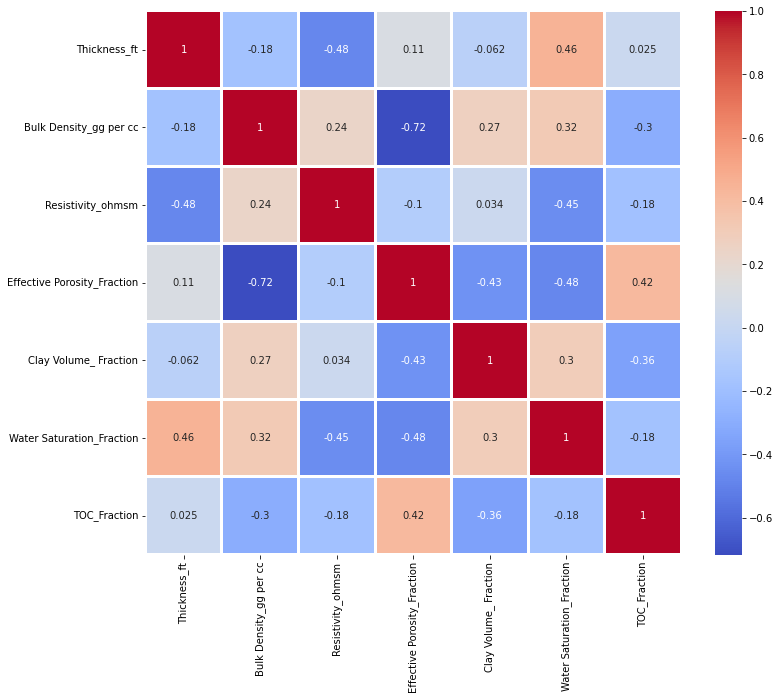

In [8]:
# Checking for inter relationship between features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linecolor='white', linewidths=2, cmap='coolwarm')

In [9]:
# Seperation of data into input and output features
y=df['TOC_Fraction']
x=df.drop(['TOC_Fraction'], axis=1)

In [10]:
# Split data set for training and testing
seed=100
np.random.seed(seed)
train_X,test_X,train_y,test_y = train_test_split(x,y, test_size=0.2)

In [11]:
# Apply XGBoost regression
model = xgb.XGBRegressor(n_estimators=10000, max_depth=10, eta=0.1, objective='reg:squarederror', subsample=1, colsample_bytree=1)  

In [12]:
# Train the model on training data
model.fit(train_X, train_y)

XGBRegressor(eta=0.1, max_depth=10, n_estimators=10000,
             objective='reg:squarederror')

In [13]:
# Prediction
y_pred_train=model.predict(train_X)
y_pred_test=model.predict(test_X)

In [14]:
# Correlation value between output test data and predicted output test data
corr_test=np.corrcoef(test_y, y_pred_test) [0,1]
print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4))

Testing Data R^2= 0.778 R= 0.882


In [15]:
from sklearn.metrics import mean_squared_error as MSE

In [16]:
#Computing errors of model
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(test_y, y_pred_test),5))
print('MSE:', round(metrics.mean_squared_error(test_y, y_pred_test),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(test_y, y_pred_test)),5))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
XG_MAPE= MAPE(test_y,y_pred_test)
print("MAPE: ",XG_MAPE)

MAE: 0.0013
MSE: 1e-05
RMSE: 0.00249
MAPE:  2.7373158563225806


Text(0.5, 1.0, 'TOC Training Actual Vs. Prediction')

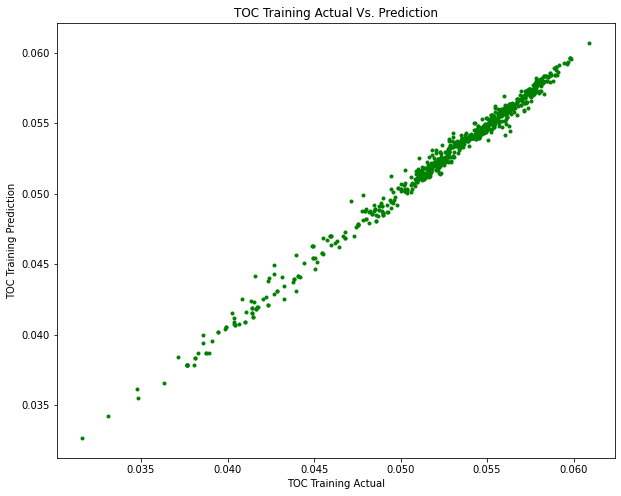

In [17]:
# Scatterplot showing relationship Actual and Predicted training data
plt.figure(figsize=(10,8))
plt.plot(train_y, y_pred_train, 'g.')
plt.xlabel('TOC Training Actual')
plt.ylabel('TOC Training Prediction')
plt.title('TOC Training Actual Vs. Prediction')

Text(0.5, 1.0, 'Feature Importance Ranking')

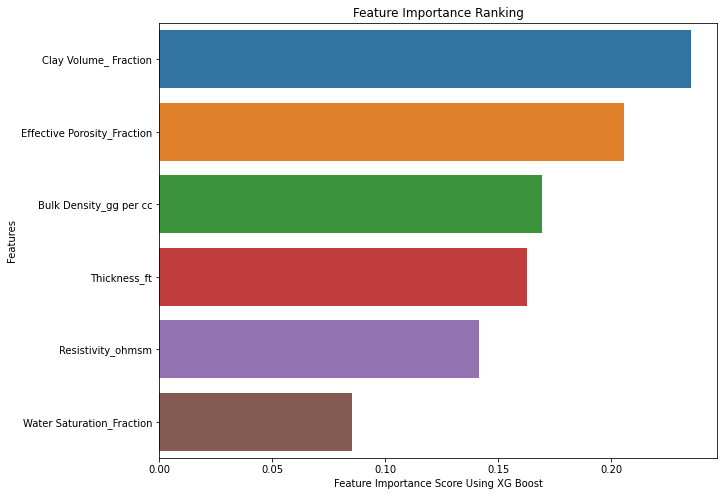

In [18]:
# Feature ranking among input features
feature_names = data.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using XG Boost')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

In [26]:
# Generating cross-validation score for model fit checking
from sklearn.model_selection import cross_val_score
seed=100
np.random.seed(seed)
scores_R2 = cross_val_score(model, x, y,cv=10,scoring='r2')
print(" Average R2_Cross-validation scores- XGBoost: {}". format( scores_R2.mean()))

 Average R2_Cross-validation scores- XGBoost: 0.8132651000352069


In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
np.random.seed(seed)
dtree = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=4, min_samples_leaf=2,
                              max_features=None,ccp_alpha=0)

In [23]:
dtree.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(ccp_alpha=0, criterion='mse', min_samples_leaf=2,
                      min_samples_split=4)

In [27]:
np.random.seed(seed)
scores_R2 = cross_val_score(dtree, x, y,cv=10,scoring='r2')

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

In [28]:
print(" Average R2_Cross-validation scores- Decision Tree: {}". format( scores_R2.mean()))

 Average R2_Cross-validation scores- Decision Tree: 0.6376881853249097
